# 1. PDF reader


In [1]:
!pip install langchain_community 
!pip install pymupdf

In [6]:
# load file by pymupdf modal of langchain 
from langchain_community.document_loaders import PyMuPDFLoader
loader = PyMuPDFLoader("data/2103.00020v1.pdf")
data1 = loader.load()
print(type(data1))
print(data1)

<class 'list'>
[Document(metadata={'source': 'data/2103.00020v1.pdf', 'file_path': 'data/2103.00020v1.pdf', 'page': 0, 'total_pages': 48, 'format': 'PDF 1.5', 'title': 'Learning Transferable Visual Models From Natural Language Supervision', 'author': 'Alec Radford, Jong Wook Kim, Chris Hallacy, Aditya Ramesh, Gabriel Goh, Sandhini Agarwal, Girish Sastry, Amanda Askell, Pamela Mishkin, Jack Clark, Gretchen Krueger, Ilya Sutskever', 'subject': 'Proceedings of the International Conference on Machine Learning 2020', 'keywords': '', 'creator': 'LaTeX with hyperref', 'producer': 'pdfTeX-1.40.21', 'creationDate': 'D:20210302022406Z', 'modDate': 'D:20210302022406Z', 'trapped': ''}, page_content='Learning Transferable Visual Models From Natural Language Supervision\nAlec Radford * 1 Jong Wook Kim * 1 Chris Hallacy 1 Aditya Ramesh 1 Gabriel Goh 1 Sandhini Agarwal 1\nGirish Sastry 1 Amanda Askell 1 Pamela Mishkin 1 Jack Clark 1 Gretchen Krueger 1 Ilya Sutskever 1\nAbstract\nState-of-the-art compu

This is a python class for langchain and RAG,so it will be easy to get the textual information of the pdf.But it cannot get the images.

In [8]:
import fitz
data2 = fitz.open("data/2103.00020v1.pdf")
print(type(data2))
print(data2)

<class 'pymupdf.Document'>
Document('data/2103.00020v1.pdf')


In [14]:
# check the image
from IPython.display import Image, display

image2 = data2[1].get_images()
print(type(image2[0]))
display(image2[0])

<class 'tuple'>


(110, 0, 120, 120, 8, 'DeviceRGB', '', 'X12', 'FlateDecode')

In [16]:
import os
def extract_images_from_pdf(pdf_path, folder_path):
    """提取 PDF 中的图片并保存到指定文件夹"""
    doc = fitz.open(pdf_path)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        
    for page_number in range(len(doc)):
        page = doc[page_number]
        images = page.get_images(full=True)

        for img_index, img in enumerate(images):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]
            image_ext = base_image["ext"]
            image_path = os.path.join(
                folder_path, f"page_{page_number + 1}_img_{img_index + 1}.{image_ext}"
            )

            with open(image_path, "wb") as img_file:
                img_file.write(image_bytes)
            #print(f"图片已提取并保存到: {image_path}")

In [17]:
extract_images_from_pdf("data/2103.00020v1.pdf", "data/image")

图片已提取并保存到: data/image\page_2_img_1.png
图片已提取并保存到: data/image\page_2_img_2.png
图片已提取并保存到: data/image\page_2_img_3.png
图片已提取并保存到: data/image\page_2_img_4.png
图片已提取并保存到: data/image\page_2_img_5.png
图片已提取并保存到: data/image\page_15_img_1.jpeg
图片已提取并保存到: data/image\page_15_img_2.jpeg
图片已提取并保存到: data/image\page_15_img_3.jpeg
图片已提取并保存到: data/image\page_15_img_4.jpeg
图片已提取并保存到: data/image\page_15_img_5.jpeg
图片已提取并保存到: data/image\page_15_img_6.jpeg
图片已提取并保存到: data/image\page_15_img_7.jpeg
图片已提取并保存到: data/image\page_15_img_8.jpeg
图片已提取并保存到: data/image\page_15_img_9.jpeg
图片已提取并保存到: data/image\page_15_img_10.jpeg
图片已提取并保存到: data/image\page_15_img_11.jpeg
图片已提取并保存到: data/image\page_15_img_12.jpeg
图片已提取并保存到: data/image\page_15_img_13.jpeg
图片已提取并保存到: data/image\page_15_img_14.jpeg
图片已提取并保存到: data/image\page_15_img_15.jpeg
图片已提取并保存到: data/image\page_15_img_16.jpeg
图片已提取并保存到: data/image\page_15_img_17.jpeg
图片已提取并保存到: data/image\page_15_img_18.jpeg
图片已提取并保存到: data/image\page_15_img_19.jpeg
图片已提取并保存到: data/

In [18]:
extract_images_from_pdf("data/deeplearning.pdf", "data/image1")


图片已提取并保存到: data/image1\page_1_img_1.png
图片已提取并保存到: data/image1\page_1_img_2.jpeg
图片已提取并保存到: data/image1\page_2_img_1.png
图片已提取并保存到: data/image1\page_2_img_2.png
图片已提取并保存到: data/image1\page_2_img_3.png
图片已提取并保存到: data/image1\page_4_img_1.jpeg
图片已提取并保存到: data/image1\page_4_img_2.jpeg
图片已提取并保存到: data/image1\page_5_img_1.png
图片已提取并保存到: data/image1\page_6_img_1.jpeg
图片已提取并保存到: data/image1\page_8_img_1.jpeg
图片已提取并保存到: data/image1\page_8_img_2.jpeg
图片已提取并保存到: data/image1\page_8_img_3.jpeg
图片已提取并保存到: data/image1\page_9_img_1.png
图片已提取并保存到: data/image1\page_10_img_1.jpeg
图片已提取并保存到: data/image1\page_10_img_2.jpeg
图片已提取并保存到: data/image1\page_10_img_3.png
图片已提取并保存到: data/image1\page_11_img_1.jpeg
图片已提取并保存到: data/image1\page_12_img_1.jpeg
图片已提取并保存到: data/image1\page_13_img_1.jpeg
图片已提取并保存到: data/image1\page_14_img_1.png
图片已提取并保存到: data/image1\page_14_img_2.jpeg
图片已提取并保存到: data/image1\page_14_img_3.png
图片已提取并保存到: data/image1\page_15_img_1.png
图片已提取并保存到: data/image1\page_16_img_1.jpeg
图片已提取并保存到: data

In [19]:
display("data/image1/page_15_img_1.png")

'data/image1/page_15_img_1.png'

# 2. vector database

In [2]:
!pip install -U pymilvus
!pip install --upgrade pymilvus
!pip install "pymilvus[model]"
!pip install milvus_lite

ERROR: Could not find a version that satisfies the requirement milvus_lite (from versions: none)
ERROR: No matching distribution found for milvus_lite


In [ ]:
# get the vd ready
# 1. 
from pymilvus import MilvusClient

client = MilvusClient("milvus_demo.db")

In [3]:

# 2. create a collection
if client.has_collection(collection_name="demo_collection"):
    client.drop_collection(collection_name="demo_collection")
client.create_collection(
    collection_name="demo_collection",
    dimension=768,  # The vectors we will use in this demo has 768 dimensions
)

Failed to create new connection using: f808ff416eee4750a9d0b3e5f6951b26


ModuleNotFoundError: No module named 'milvus_lite'

In [ ]:
# import necessary packge
from pymilvus import model


In [ ]:
# create

embedding_fn = model.DefaultEmbeddingFunction()

vectors = embedding_fn.encode_documents(docs)
print("Dim:", embedding_fn.dim, vectors[0].shape)  # Dim: 768 (768,)

data = [
    {"id": i, "vector": vectors[i], "text": docs[i], "subject": "history"}
    for i in range(len(vectors))
]

print("Data has", len(data), "entities, each with fields: ", data[0].keys())
print("Vector dim:", len(data[0]["vector"]))

docs = [
    "Artificial intelligence was founded as an academic discipline in 1956.",
    "Alan Turing was the first person to conduct substantial research in AI.",
    "Born in Maida Vale, London, Turing was raised in southern England.",
]

docs_embeddings = jina_ef.encode_documents(docs)

# Print embeddings
print("Embeddings:", docs_embeddings)
# Print dimension and shape of embeddings
print("Dim:", jina_ef.dim, docs_embeddings[0].shape)


In [4]:
!pip install towhee
!pip install --upgrade pip

In [5]:
from towhee import ops, pipe, DataCollection
import numpy as np

p = (
    pipe.input('path')
    .map('path', 'img', ops.image_decode.cv2('rgb'))
    .map('img', 'vec', ops.image_text_embedding.clip(model_name='clip_vit_base_patch16', modality='image'))
    .map('vec', 'vec', lambda x: x / np.linalg.norm(x))
    .output('img', 'vec')
)

DataCollection(p('/data/image1/page_15_img_1.png')).show()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import cv2

def read_image(image_ids):
    df = pd.read_csv('reverse_image_search.csv')
    id_img = df.set_index('id')['path'].to_dict()
    imgs = []
    decode = ops.image_decode.cv2('rgb')
    for image_id in image_ids:
        path = id_img[image_id]
        imgs.append(decode(path))
    return imgs


p4 = (
    pipe.input('text')
    .map('text', 'vec', ops.image_text_embedding.clip(model_name='clip_vit_base_patch16', modality='text'))
    .map('vec', 'vec', lambda x: x / np.linalg.norm(x))
    .map('vec', 'result', ops.ann_search.milvus_client(
        host='127.0.0.1', 
        port='19530', 
        collection_name='demo_collection', 
        limit=5))
    .map('result', 'image_ids', lambda x: [item[0] for item in x])
    .map('image_ids', 'images', read_image)
    .output('text', 'images')
)

DataCollection(p4("A white dog")).show()

In [7]:
!pip install langchain_milvus
!pip install -U langchain-community

In [2]:
import requests
from langchain_community.embeddings import JinaEmbeddings
from numpy import dot
from numpy.linalg import norm
from PIL import Image

Image:


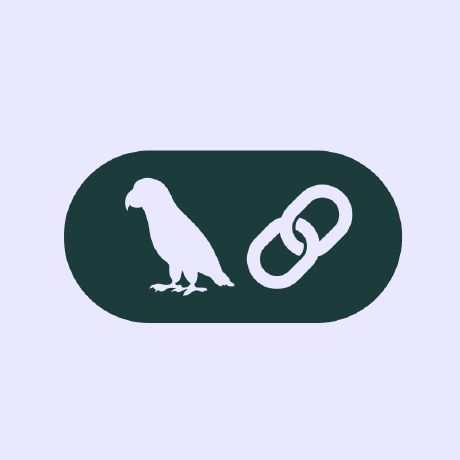

In [3]:
multimodal_embeddings = JinaEmbeddings(
    jina_api_key="jina_90ccec6f73974abb890cbcb51e9b4d48jPoZepWAhf80Q-e21Lyys3hq6Gts", 
    model_name="jina-clip-v1")
image = "https://avatars.githubusercontent.com/u/126733545?v=4"
description = "Logo of a parrot and a chain on green background"
im = Image.open(requests.get(image, stream=True).raw)
print("Image:")
display(im)
image_result = multimodal_embeddings.embed_images([image])

In [4]:
from langchain_milvus import Milvus

# The easiest way is to use Milvus Lite where everything is stored in a local file.
# If you have a Milvus server you can use the server URI such as "http://localhost:19530".
URI = "./milvus_example.db"

vector_store = Milvus(
    embedding_function=multimodal_embeddings,
    connection_args={"uri": URI},
)

Failed to create new connection using: fd6d24cec3cf40c797e689c643e9eb0c


ModuleNotFoundError: No module named 'milvus_lite'

In [6]:
%pip install -qU  langchain_milvus
!pip install milvus[client]

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.3/24.8 MB ? eta -:--:--
      -------------------------------------- 0.5/24.8 MB 524.3 kB/s eta 0:00:47
      -------------------------------------- 0.5/24.8 MB 524.3 kB/s eta 0:00:47
      -------------------------------------- 0.5/24.8 MB 524.3 kB/s eta 0:00:47
     - ------------------------------------- 0.8/24.8 MB 516.5 kB/s eta 0:00:47
     - ------------------------------------- 0.8/24.8 MB 516.5 kB/s eta 0:00:47
     - ------------------------------------- 1.0/24.8 MB 488.8 kB/s eta 0:00:49
     - ------------------------------------- 1.0/24.8 MB 488.8 kB/s eta 0:00:49
     - -------

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\ayanjiushishuai\\AppData\\Local\\Temp\\pip-install-ynd5l18d\\grpcio_68e10702ace749a8b9a5ef47848b4788\\third_party\\boringssl-with-bazel\\src\\pki\\testdata\\verify_certificate_chain_unittest\\intermediate-wrong-signature-no-authority-key-identifier\\generate-chains.py'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [ ]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

In [ ]:
# search 
results = vector_store.similarity_search(
    "LangChain provides abstractions to make working with LLMs easy",
    k=2,
    expr='source == "tweet"',
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")